### Figure 1: Predicted images

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

sns.set_style("white")
sns.set_palette(sns.color_palette("Paired"))
sns.set_palette(sns.color_palette("Set2"))

print(np.load('/user/home/al18709/work/tc_data_flipped/train_X.npy').shape)
print(np.load('/user/home/al18709/work/tc_data_mswep/train_X.npy').shape)

(46894, 10, 10)
(46894, 10, 10)


In [2]:
def regrid(array):
        hr_array = np.zeros((100,100))
        for i in range(10):
                for j in range(10):
                        i1 = i*10
                        i2 = (i+1)*10
                        j1 = j*10
                        j2 = (j+1)*10
                        hr_array[i1:i2,j1:j2] = array[i,j]
        return hr_array

In [3]:
# load data
real = np.load('/user/home/al18709/work/gan_predictions_20/validation_real-opt_improve.npy')
inputs = np.load('/user/home/al18709/work/gan_predictions_20/validation_input-opt_improve.npy')
pred_cnn = np.load('/user/home/al18709/work/cnn/unet_valid_2.npy')
pred_dsrnngan = np.load('/user/home/al18709/work/gan_predictions_20/validation_pred-opt_improve.npy')[:,:,:,0]
pred_vaegan = np.load('/user/home/al18709/work/vaegan_predictions_20/extreme_valid_pred-opt_improve_2.npy')[:,:,:,0]
# pred_dsrnngan = np.load('/user/home/al18709/work/vaegan_predictions_20/extreme_valid_pred-opt_improve_5.npy')[:,:,:,0]

In [4]:
def plot_predictions(inputs,pred_cnn,pred_vaegan,pred_dsrnngan,real,storms,range_):
	if plot == 'save':
			fig, axes = plt.subplots(n, m, figsize=(5*m, 5*n), sharey=True)
	else:
			print('show')
			fig, axes = plt.subplots(n, m, figsize=(2*m, 2*n), sharey=True)

	# axes[0,0].set_title('Real',size=24)
	# axes[0,1].set_title('Predicted',size=24)
	# axes[0,2].set_title('Input',size=24)
	pal = sns.cubehelix_palette(10, rot=-.25, light=.7,as_cmap=True)

	for i in range(m):
		j = 0
		storm = storms[i]
		print('storm max: ',real[storm].max())
		print('cnn max: ',pred_cnn[storm].max())
		print('vaegan max: ',pred_vaegan[storm].max())
		print('dsrnngan max: ',pred_dsrnngan[storm].max())
		print('inputs max: ', np.nanmax(inputs[storm]))
		axes[j,i].imshow(regrid(inputs[storm]), interpolation='nearest', extent=None,cmap='Blues')
		axes[j+1,i].imshow(pred_cnn[storm], interpolation='nearest',norm=colors.Normalize(*range_), extent=None,cmap='Blues')
		axes[j+2,i].imshow(pred_vaegan[storm], interpolation='nearest',norm=colors.Normalize(*range_), extent=None,cmap='Blues')
		axes[j+3,i].imshow(pred_dsrnngan[storm], interpolation='nearest',norm=colors.Normalize(*range_), extent=None,cmap='Blues')
		axes[j+4,i].imshow(real[storm], interpolation='nearest',norm=colors.Normalize(*range_), extent=None,cmap='Blues')
		axes[j,i].set(xticklabels=[])
		axes[j,i].set(yticklabels=[])
		axes[j+1,i].set(xticklabels=[])
		axes[j+1,i].set(yticklabels=[])
		axes[j+2,i].set(xticklabels=[])
		axes[j+2,i].set(yticklabels=[])
		axes[j+3,i].set(xticklabels=[])
		axes[j+3,i].set(yticklabels=[])
		axes[j+4,i].set(xticklabels=[])
		axes[j+4,i].set(yticklabels=[])

	fig.tight_layout()

	if plot == 'save':
			plt.savefig('figure_1.png',bbox_inches='tight')
			plt.clf()
	else:
			plt.show()

show
storm max:  18.0625
cnn max:  20.178532
vaegan max:  49.39329528808594
dsrnngan max:  25.085460662841797
inputs max:  10.924680709838867
storm max:  24.0
cnn max:  25.584759
vaegan max:  35.23752212524414
dsrnngan max:  28.56232452392578
inputs max:  11.335227012634277
storm max:  37.5625
cnn max:  29.894676
vaegan max:  58.73749542236328
dsrnngan max:  42.54085159301758
inputs max:  25.96354103088379
storm max:  33.4375
cnn max:  21.41453
vaegan max:  37.775447845458984
dsrnngan max:  25.401323318481445
inputs max:  10.968031883239746
storm max:  48.6875
cnn max:  25.12411
vaegan max:  75.69388580322266
dsrnngan max:  42.865325927734375
inputs max:  19.738325119018555
storm max:  24.5
cnn max:  16.038965
vaegan max:  46.037418365478516
dsrnngan max:  19.41500473022461
inputs max:  13.426697731018066


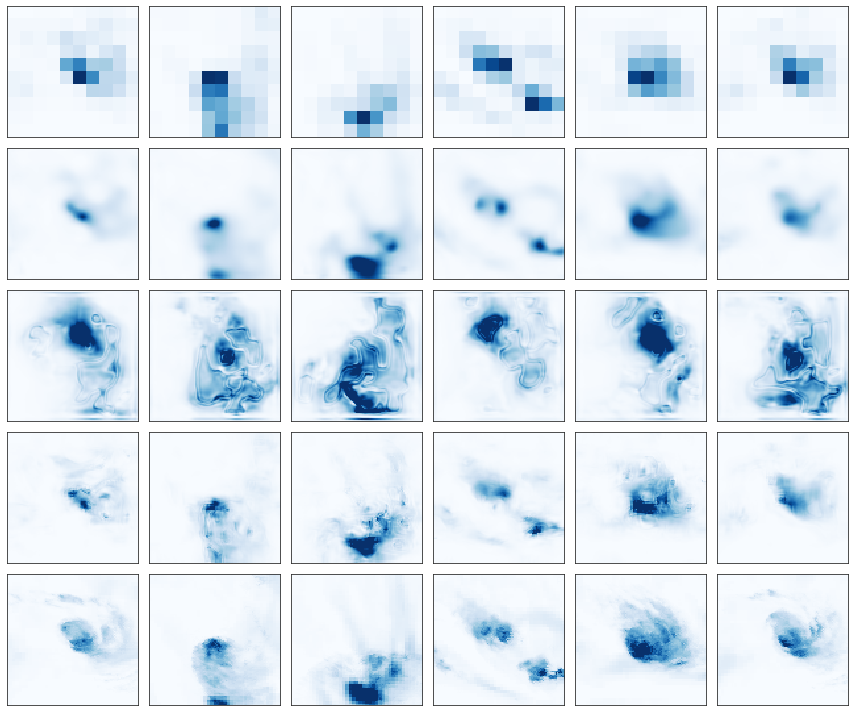

In [5]:

plot = 'show'
n = 5
m = 6
# make colours
range_ = (0, 20)
# storms = [16249,15872,3,4,5,6,7,8]
storms = [1,2,3,4,5,6,7,8]

plot_predictions(inputs,pred_cnn,pred_vaegan,pred_dsrnngan,real,storms,range_)


show
storm max:  69.6875
cnn max:  17.023201
vaegan max:  69.07337951660156
dsrnngan max:  53.83024215698242
inputs max:  36.317928314208984
storm max:  74.75
cnn max:  21.345694
vaegan max:  45.18961715698242
dsrnngan max:  33.72003936767578
inputs max:  16.329853057861328
storm max:  32.0
cnn max:  31.40955
vaegan max:  35.99995803833008
dsrnngan max:  36.88505172729492
inputs max:  23.81348991394043
storm max:  53.125
cnn max:  19.572834
vaegan max:  33.2552375793457
dsrnngan max:  28.94032859802246
inputs max:  20.76664924621582
storm max:  80.4375
cnn max:  27.365452
vaegan max:  74.31311798095703
dsrnngan max:  71.41321563720703
inputs max:  42.445186614990234
storm max:  76.5625
cnn max:  17.473606
vaegan max:  45.40509796142578
dsrnngan max:  37.87091827392578
inputs max:  20.062210083007812


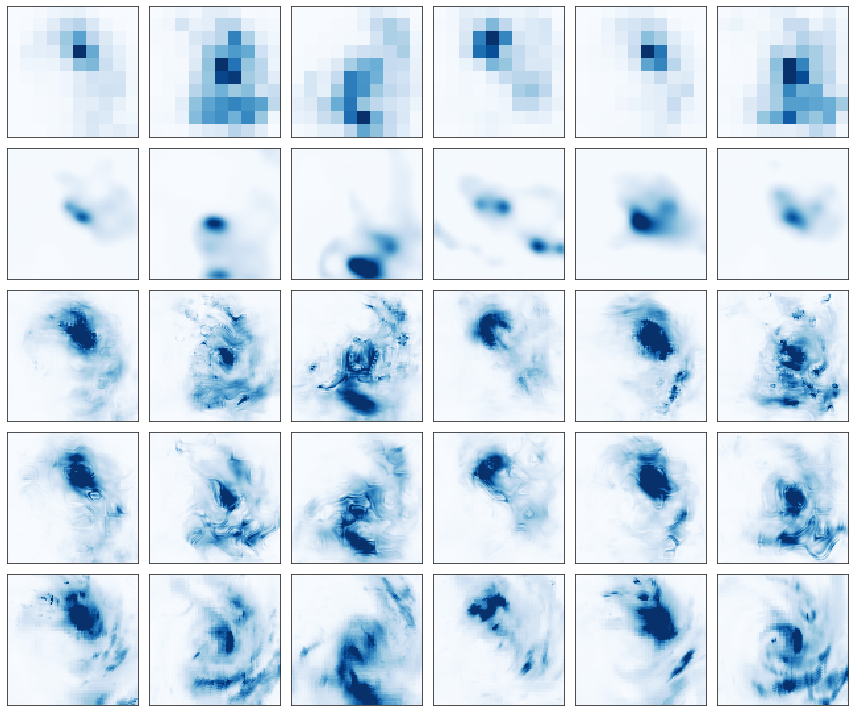

In [9]:
real = np.load('/user/home/al18709/work/gan_predictions_20/extreme_valid_real-opt_improve_7.npy')
inputs = np.load('/user/home/al18709/work/gan_predictions_20/extreme_valid_input-opt_improve_7.npy')
pred_cnn = np.load('/user/home/al18709/work/cnn/unet_valid.npy')
pred_dsrnngan = np.load('/user/home/al18709/work/gan_predictions_20/extreme_valid_pred-opt_improve_8.npy')[:,:,:,0]
# pred_vaegan = np.load('/user/home/al18709/work/vaegan_predictions_20/extreme_valid_pred-opt_improve_5.npy')[:,:,:,0]
pred_vaegan = np.load('/user/home/al18709/work/gan_predictions_20/extreme_valid_pred-opt_improve.npy')[:,:,:,0]
# pred_dsrnngan = np.load('/user/home/al18709/work/vaegan_predictions_20/extreme_valid_pred-opt_improve_6.npy')[:,:,:,0]

plot = 'show'
n = 5
m = 6
range_ = (0, 20)
storms = [1,2,3,4,5,6,7,8]

plot_predictions(inputs,pred_cnn,pred_vaegan,pred_dsrnngan,real,storms,range_)

In [8]:
print(real.shape)
print(pred_dsrnngan.shape)

(5425, 100, 100, 1)
(5425, 100, 100)


(16253, 100, 100)
(16252, 100, 100)
